# Teenage Mental Health Analysis Project

## Project Description

This project analyzes a dataset containing behavioral and lifestyle data from teenagers, collected via social media, surveys, and wearable devices. The goal is to understand the patterns and factors related to **stress levels** in teenagers.

By exploring variables such as sleep hours, physical activity, GPA, social media usage, and mood, we aim to uncover correlations and trends that might help identify early signs of stress and improve mental well-being.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Display all columns

In [2]:
pd.set_option('display.max_columns', None)

### Load the Dataset

In [3]:
file_path = 'Mental Health Teenagers.xlsx'
df = pd.read_excel(file_path)

In [4]:
df.head()

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,1,16,F,10,2,5,8,3,0,Moderate,Excellent
1,2,17,M,9,0,9,5,5,0,Moderate,Good
2,3,15,M,5,1,5,9,2,0,Moderate,Poor
3,4,17,F,8,1,5,10,5,1,Moderate,Average
4,5,17,F,1,1,6,11,5,1,High,Poor


In [5]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   User_ID                1000 non-null   int64 
 1   Age                    1000 non-null   int64 
 2   Gender                 1000 non-null   object
 3   Social_Media_Hours     1000 non-null   int64 
 4   Exercise_Hours         1000 non-null   int64 
 5   Sleep_Hours            1000 non-null   int64 
 6   Screen_Time_Hours      1000 non-null   int64 
 7   Survey_Stress_Score    1000 non-null   int64 
 8   Wearable_Stress_Score  1000 non-null   int64 
 9   Support_System         1000 non-null   object
 10  Academic_Performance   1000 non-null   object
dtypes: int64(8), object(3)
memory usage: 86.1+ KB


In [6]:
# Check for missing values
df.isnull().sum()

User_ID                  0
Age                      0
Gender                   0
Social_Media_Hours       0
Exercise_Hours           0
Sleep_Hours              0
Screen_Time_Hours        0
Survey_Stress_Score      0
Wearable_Stress_Score    0
Support_System           0
Academic_Performance     0
dtype: int64

In [7]:
# Check data types
df.dtypes

User_ID                   int64
Age                       int64
Gender                   object
Social_Media_Hours        int64
Exercise_Hours            int64
Sleep_Hours               int64
Screen_Time_Hours         int64
Survey_Stress_Score       int64
Wearable_Stress_Score     int64
Support_System           object
Academic_Performance     object
dtype: object

In [8]:
# Shape of the dataset
df.shape

(1000, 11)

In [9]:
# Descriptive statistics
df.describe()

,User_ID,Age,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,15.457000,4.984000,1.519000,7.012000,7.072000,3.067000,0.514000
std,288.819436,1.714377,2.909675,0.969835,1.779051,2.984246,1.401597,0.500054
min,1.000000,13.000000,0.000000,0.000000,4.000000,2.000000,1.000000,0.000000
25%,250.750000,14.000000,2.000000,1.000000,6.000000,4.000000,2.000000,0.000000
50%,500.500000,16.000000,5.000000,2.000000,7.000000,7.000000,3.000000,1.000000
75%,750.250000,17.000000,8.000000,2.000000,8.250000,10.000000,4.000000,1.000000
max,1000.000000,18.000000,10.000000,3.000000,10.000000,12.000000,5.000000,1.000000


In [10]:
# Unique values in categorical columns
df['Gender'].value_counts()
df['Support_System'].value_counts()
df['Academic_Performance'].value_counts()

Academic_Performance
Poor         279
Excellent    244
Good         244
Average      233
Name: count, dtype: int64

## Data Analysis

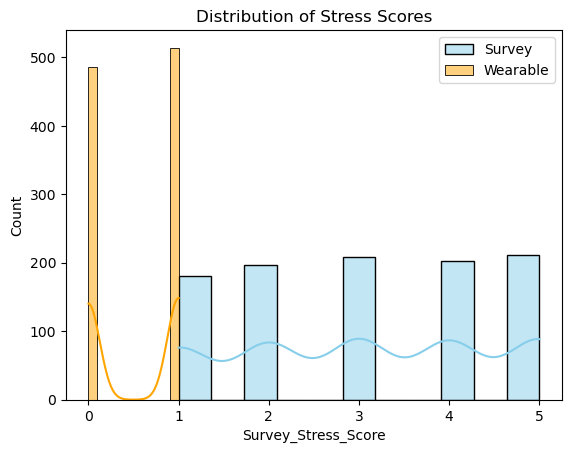

In [11]:
sns.histplot(df['Survey_Stress_Score'], kde=True, color='skyblue', label='Survey')
sns.histplot(df['Wearable_Stress_Score'], kde=True, color='orange', label='Wearable')
plt.legend()
plt.title('Distribution of Stress Scores')
plt.show()

In [12]:
## Average Stress Levels by Gender

df.groupby('Gender')[['Survey_Stress_Score', 'Wearable_Stress_Score']].mean()

,Survey_Stress_Score,Wearable_Stress_Score
Gender,,
F,3.062257,0.527237
M,3.072016,0.500000


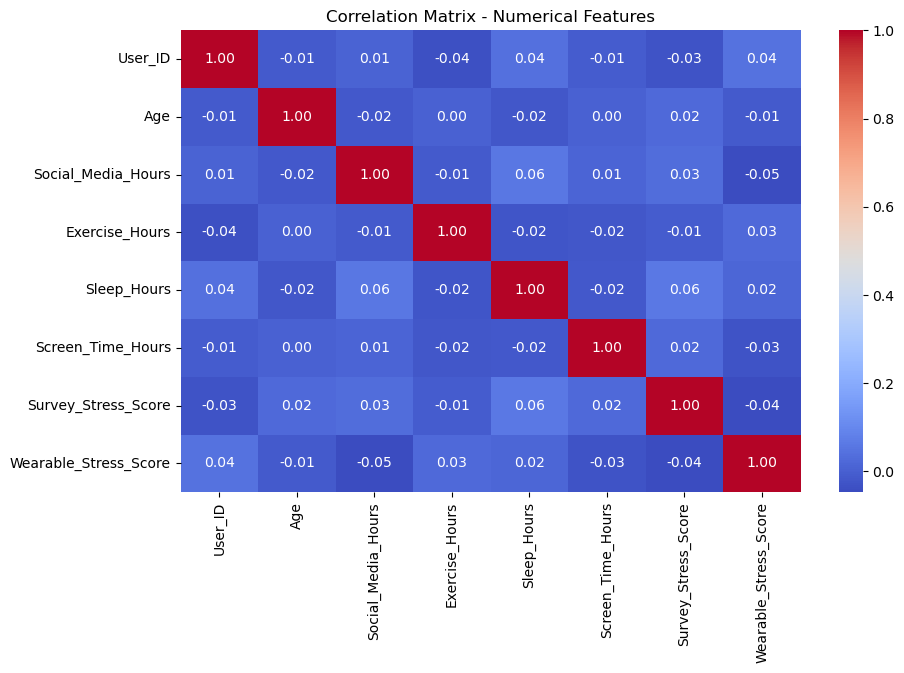

In [15]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Numerical Features')
plt.show()

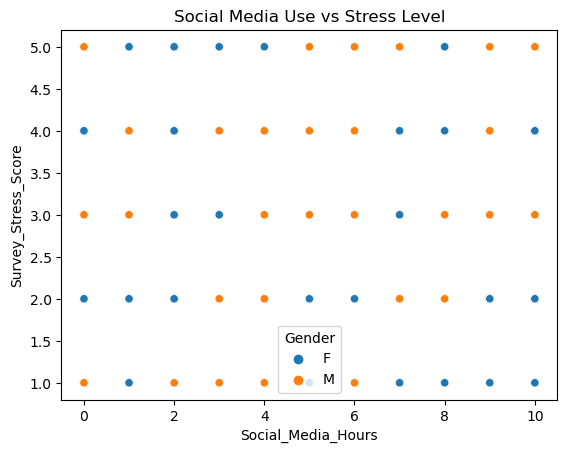

In [16]:
## Social Media Hours vs Stress

sns.scatterplot(data=df, x='Social_Media_Hours', y='Survey_Stress_Score', hue='Gender')
plt.title('Social Media Use vs Stress Level')
plt.show()

C:\Users\akshi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


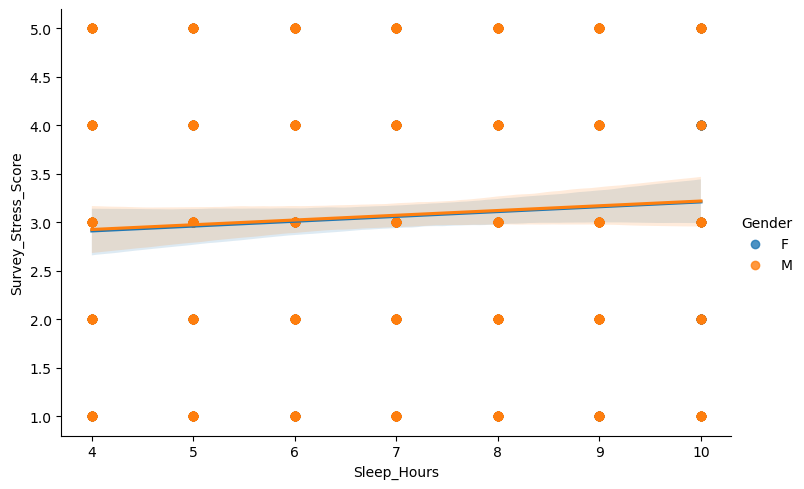

In [17]:
## Relationship between Sleep and Stress

sns.lmplot(data=df, x='Sleep_Hours', y='Survey_Stress_Score', hue='Gender', aspect=1.5)

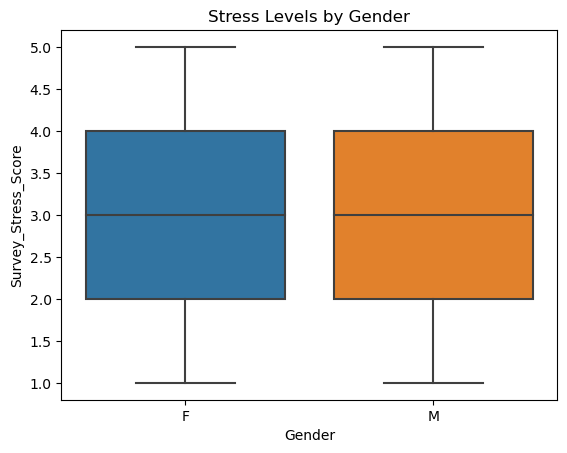

In [18]:
## Stress by Gender

sns.boxplot(data=df, x='Gender', y='Survey_Stress_Score')
plt.title("Stress Levels by Gender")
plt.show()

In [19]:
## Average Social Media Usage by Academic Performance

df.groupby('Academic_Performance')['Social_Media_Hours'].mean()

Academic_Performance
Average      5.077253
Excellent    5.331967
Good         4.864754
Poor         4.706093
Name: Social_Media_Hours, dtype: float64

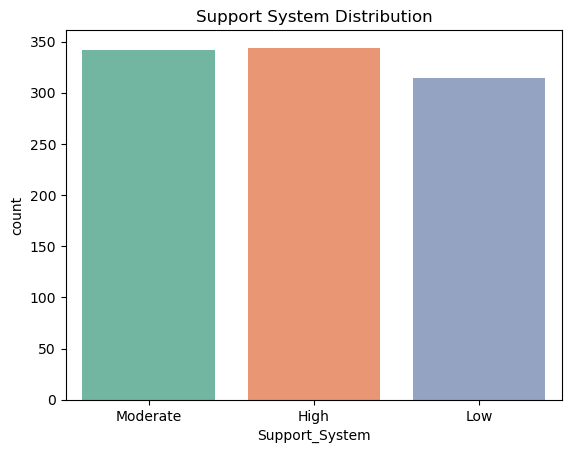

In [20]:
## Count of Teenagers by Support System

sns.countplot(data=df, x='Support_System', palette='Set2')
plt.title("Support System Distribution")
plt.show()

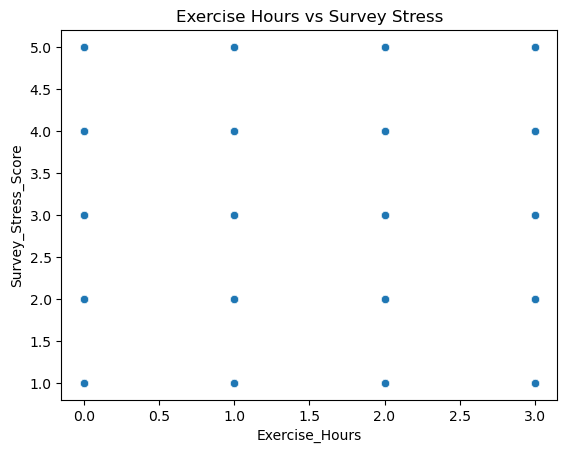

In [21]:
## Exercise VS Stress

sns.scatterplot(data=df, x='Exercise_Hours', y='Survey_Stress_Score')
plt.title("Exercise Hours vs Survey Stress")
plt.show()

In [22]:
## Top 10 Highest Survey Stress Scores

df.nlargest(10, 'Survey_Stress_Score')

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
1,2,17,M,9,0,9,5,5,0,Moderate,Good
3,4,17,F,8,1,5,10,5,1,Moderate,Average
4,5,17,F,1,1,6,11,5,1,High,Poor
5,6,14,M,10,1,9,6,5,0,Low,Poor
8,9,15,M,3,1,7,7,5,0,Low,Poor
17,18,18,F,4,2,5,10,5,1,Low,Good
18,19,14,F,2,2,5,7,5,1,High,Average
27,28,13,F,5,1,5,4,5,1,High,Poor
28,29,13,F,8,1,4,11,5,0,Low,Poor
30,31,15,M,7,3,9,11,5,0,High,Average


In [23]:
## Teens Sleeping Less than 6 Hours

df[df['Sleep_Hours'] < 6]

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,1,16,F,10,2,5,8,3,0,Moderate,Excellent
2,3,15,M,5,1,5,9,2,0,Moderate,Poor
3,4,17,F,8,1,5,10,5,1,Moderate,Average
6,7,15,F,10,2,5,9,4,1,Low,Excellent
7,8,15,F,2,0,5,8,4,1,Moderate,Poor
...,...,...,...,...,...,...,...,...,...,...,...
970,971,17,F,2,2,5,7,2,0,Moderate,Good
973,974,16,F,9,2,5,12,5,0,High,Average
975,976,15,F,2,0,5,10,2,1,High,Average
990,991,14,M,5,2,4,12,5,0,Moderate,Excellent


In [24]:
## Compare Survey and Wearable Stress

df['Stress_Diff'] = df['Survey_Stress_Score'] - df['Wearable_Stress_Score']
df[['Survey_Stress_Score', 'Wearable_Stress_Score', 'Stress_Diff']].head()

,Survey_Stress_Score,Wearable_Stress_Score,Stress_Diff
0,3,0,3
1,5,0,5
2,2,0,2
3,5,1,4
4,5,1,4


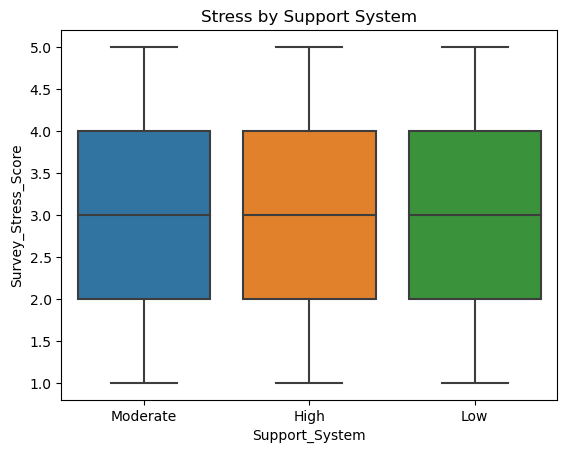

In [25]:
## Stress Level by Support System

sns.boxplot(data=df, x='Support_System', y='Survey_Stress_Score')
plt.title("Stress by Support System")
plt.show()

In [27]:
## High Stress and High School Media

df[(df['Survey_Stress_Score'] > 4) & (df['Social_Media_Hours'] > 3)]

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance,Stress_Diff
1,2,17,M,9,0,9,5,5,0,Moderate,Good,5
3,4,17,F,8,1,5,10,5,1,Moderate,Average,4
5,6,14,M,10,1,9,6,5,0,Low,Poor,5
17,18,18,F,4,2,5,10,5,1,Low,Good,4
27,28,13,F,5,1,5,4,5,1,High,Poor,4
...,...,...,...,...,...,...,...,...,...,...,...,...
974,975,14,M,10,1,7,12,5,0,High,Good,5
984,985,15,M,7,0,8,12,5,0,Moderate,Excellent,5
986,987,13,M,10,3,7,4,5,1,Low,Poor,4
990,991,14,M,5,2,4,12,5,0,Moderate,Excellent,5


In [28]:
## Group by Age: Mean Stress Levels

df.groupby('Age')[['Survey_Stress_Score', 'Wearable_Stress_Score']].mean()

,Survey_Stress_Score,Wearable_Stress_Score
Age,,
13,3.066298,0.524862
14,3.000000,0.518293
15,3.181818,0.474026
16,2.833333,0.551724
17,3.174419,0.534884
18,3.167742,0.470968


In [29]:
## Teens With and Without Support System

df['Has_Support'] = df['Support_System'].apply(lambda x: 1 if str(x).lower() == 'yes' else 0)
df.groupby('Has_Support')['Survey_Stress_Score'].mean()

Has_Support
0    3.067
Name: Survey_Stress_Score, dtype: float64

In [30]:
## Screen Time vs Stress

df[['Screen_Time_Hours', 'Survey_Stress_Score']].corr()

,Screen_Time_Hours,Survey_Stress_Score
Screen_Time_Hours,1.000000,0.022538
Survey_Stress_Score,0.022538,1.000000


C:\Users\akshi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


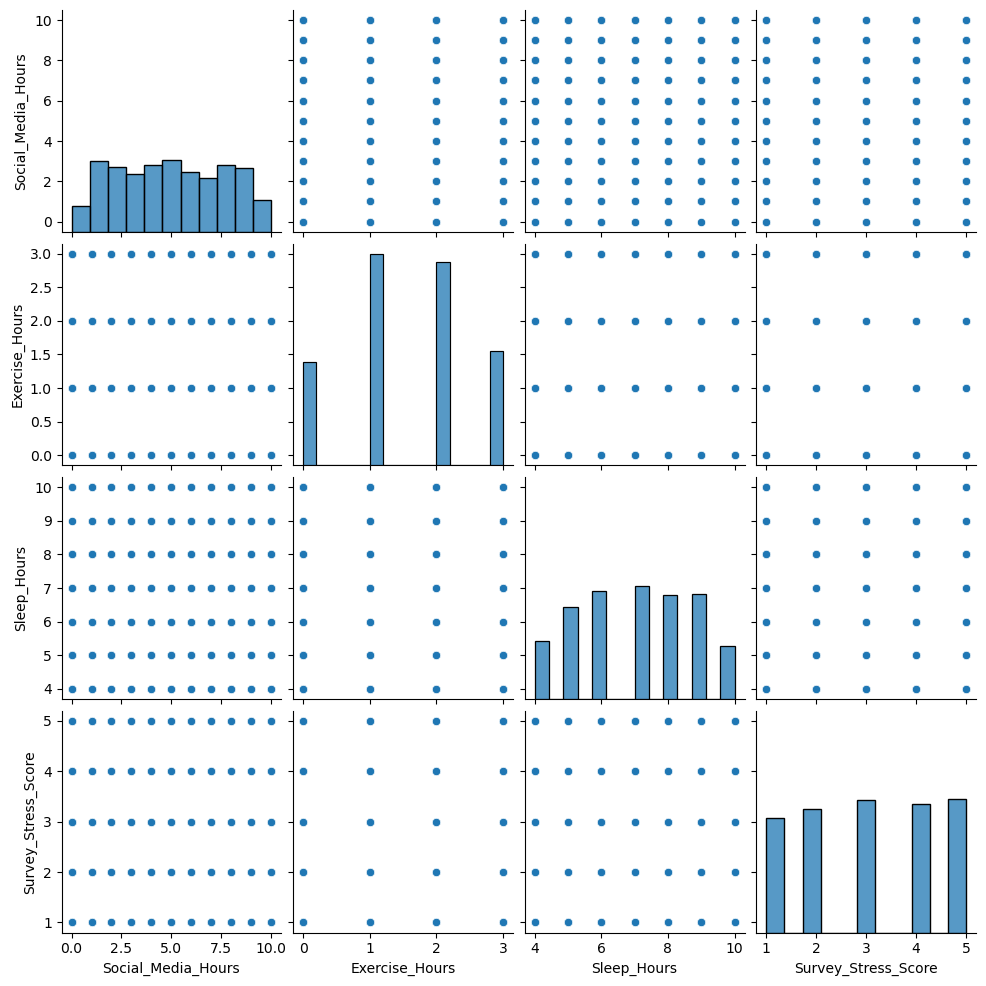

In [31]:
## Pair Plot of Key Features

sns.pairplot(df[['Social_Media_Hours', 'Exercise_Hours', 'Sleep_Hours', 'Survey_Stress_Score']])

In [32]:
## Above Average Stress

avg_stress = df['Survey_Stress_Score'].mean()
df[df['Survey_Stress_Score'] > avg_stress]

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance,Stress_Diff,Has_Support
1,2,17,M,9,0,9,5,5,0,Moderate,Good,5,0
3,4,17,F,8,1,5,10,5,1,Moderate,Average,4,0
4,5,17,F,1,1,6,11,5,1,High,Poor,4,0
5,6,14,M,10,1,9,6,5,0,Low,Poor,5,0
6,7,15,F,10,2,5,9,4,1,Low,Excellent,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,14,M,5,2,4,12,5,0,Moderate,Excellent,5,0
992,993,15,F,7,2,7,9,4,0,Moderate,Poor,4,0
994,995,17,M,9,3,6,8,5,0,High,Excellent,5,0
997,998,13,M,6,2,10,6,4,1,Moderate,Good,3,0


In [33]:
## Academic Performance vs Stress

df.groupby('Academic_Performance')['Survey_Stress_Score'].mean().sort_values()

Academic_Performance
Average      3.034335
Excellent    3.045082
Poor         3.053763
Good         3.135246
Name: Survey_Stress_Score, dtype: float64

In [34]:
## Categorize Stress Levels

def categorize_stress(score):
    if score < 4:
        return 'Low'
    elif 4 <= score < 7:
        return 'Moderate'
    else:
        return 'High'

df['Stress_Category'] = df['Survey_Stress_Score'].apply(categorize_stress)
df['Stress_Category'].value_counts()

Stress_Category
Low         586
Moderate    414
Name: count, dtype: int64

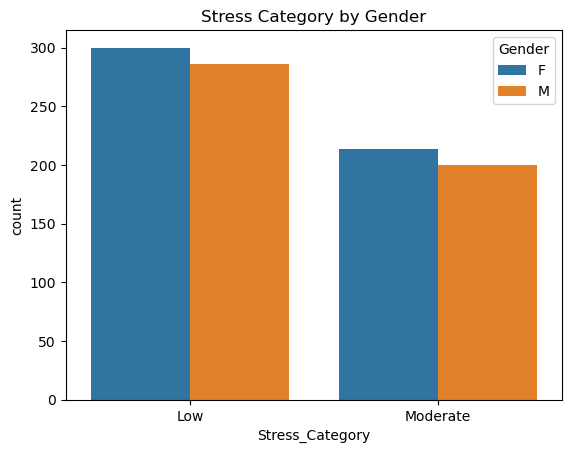

In [35]:
## Stress Category by Gender

sns.countplot(data=df, x='Stress_Category', hue='Gender')
plt.title("Stress Category by Gender")
plt.show()

In [38]:
## Low Exercise and High Stress 

df[(df['Exercise_Hours'] < 1) & (df['Survey_Stress_Score'] > 4)]

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance,Stress_Diff,Has_Support,Stress_Category
1,2,17,M,9,0,9,5,5,0,Moderate,Good,5,0,Moderate
39,40,16,M,5,0,6,7,5,1,Low,Excellent,4,0,Moderate
74,75,18,M,7,0,9,11,5,1,High,Excellent,4,0,Moderate
94,95,16,F,6,0,8,11,5,0,Low,Excellent,5,0,Moderate
103,104,13,F,2,0,6,4,5,1,Low,Good,4,0,Moderate
174,175,15,M,9,0,7,9,5,0,Moderate,Average,5,0,Moderate
194,195,13,F,6,0,10,10,5,0,High,Good,5,0,Moderate
212,213,17,M,2,0,10,4,5,1,Moderate,Average,4,0,Moderate
234,235,13,M,9,0,8,6,5,0,Low,Excellent,5,0,Moderate
374,375,14,F,4,0,7,7,5,0,Moderate,Good,5,0,Moderate


In [39]:
df.to_csv("Cleaned_Teen_Mental_Health.csv", index=False)